In [1]:
import numpy as np
import pandas as pd
import scipy
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import tqdm
import sklearn
from sklearn import datasets
from sklearn import svm
import random 

# Linear Regression


*   Dataset: house price from boston
*   Objective: implement both numerical + analytical solutions
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


1.   Analytical solution: $\beta = (X^TX)^{-1}X^T y$
2.   Numerical solution:

      *   Loss function (MSE): $\mathcal{L} (y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N (y-\hat{y})^2$
      *   Update rule: $\beta_{t+1} = \beta_t - \gamma \nabla \mathcal{L} (\beta_t)$
      *   Momentum: $\Delta \beta_{t+1} = -\gamma \nabla \mathcal{L}(\beta_{t+1}) + \alpha\Delta \beta_{t}$
      *   Update rule for momentum:  $\beta_{t+1} = \beta_t + \Delta \beta_{t}$


*  Visualize loss convergent
*  Plot linear regression line 
*  Comparison:
    -  Time 
    -  MSE
    -  Matching parameter vectors $\beta$









In [2]:
# LOAD DATA
X, y = datasets.load_boston(return_X_y=True)

In [3]:
col = np.ones((506,1), dtype = X.dtype)
X = np.append(X, col, axis = 1)
X.shape

(506, 14)

Beta by numerical solution is:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]
Numerical MSE is:  21.894831181729202
Time to execute is: 1.6391408443450928 


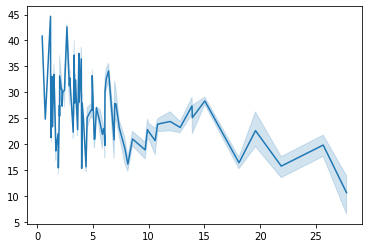

In [4]:
# IMPLEMENT NUMERICAL SOLUTION HERE
start_time = time.time() 
a = np.dot(X.T, X)
b = np.linalg.inv(a)
c = np.dot(X.T, y)
beta = np.dot(b, c)
print("Beta by numerical solution is: ", beta)
y_val = np.dot(X, beta)
sns.lineplot(x = X[:,2], y = y_val)
from sklearn.metrics import mean_squared_error
mean_num = mean_squared_error(y_val, y)
print("Numerical MSE is: ", mean_num)
print("Time to execute is: %s " %(time.time() - start_time))

In [5]:
# IMPLEMENT GRADIENT DESCENT HERE
# REQUIREMENTS: a function to calculate the gradient , a function to calculate the loss function, a function to excecute gradient descent
class MyLinearRegression:
    def cost_function(self, X, y, beta):                 
        temp = np.subtract(y, np.dot(X, beta))
        diff = np.power(temp ,2)
        cost_self = (1/506)*np.sum(diff)
        return cost_self

    def gradient(self, X, y, beta):
        sub = np.dot(X,beta)-y
        grad_self = (2/506) * np.dot(X.T,sub)
        return grad_self
    def fit(self, X, y, tau = 0.01, gamma = 0.000003):      
        beta = np.random.rand(X.shape[1])
        loss = self.cost_function(X, y, beta)
        cost_dif = 1     
        loss_i = []
        loss_i.append(loss)
        while cost_dif >= tau:        
            # Gradient Descent
              beta_new = beta -  gamma * self.gradient(X, y, beta)
              loss_new = self.cost_function(X, y, beta_new)
              cost_dif = abs(loss_new - loss) 
              loss_i.append(loss_new)
            # Saving Progress 
              beta = beta_new
              loss = loss_new
        self.beta = beta
        self.loss = loss
        return loss_i

    def predict(self, X):        
        predict_self = np.dot(X,self.beta)
        return predict_self

    def fit_momentum(self, X, y, tau = 0.01, gamma = 0.000003, alpha = 0.05): 
        loss_j = []       
        beta = np.random.rand(X.shape[1])
        N = len(X)
        loss = self.cost_function(X,y, beta)
        loss_j.append(loss)
        cost_dif = 1
        moment_beta = np.random.rand(X.shape[1])
        while cost_dif >= tau:        
            # Gradient Descent with momentum
              beta_new = beta + moment_beta
              moment_beta_new = -gamma * self.gradient(X, y, beta_new) + alpha*moment_beta
              loss_new = self.cost_function(X, y, beta_new)
              cost_dif = abs(loss_new - loss)
              loss_j.append(loss_new)
            # Saving Progress
              beta = beta_new
              moment_beta = moment_beta_new
              loss = loss_new
        self.beta = beta
        self.loss = loss
        return loss_j

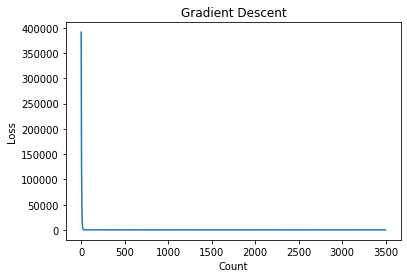

MSE gradient descent is:  68.57012837118192
Time gradient descent is: 0.2785799503326416


In [6]:
# VISUALIZATION
start_time = time.time() 
lr = MyLinearRegression()
loss_a = lr.fit(X, y)
i = list(range(0, len(loss_a)))
plt.figure(1)
plt.title("Gradient Descent")
plt.xlabel("Count")
plt.ylabel("Loss")
plt.plot(i, loss_a)
plt.show()

print("MSE gradient descent is: ", lr.loss)
print("Time gradient descent is: %s" % (time.time() - start_time))

y_predict = lr.predict(X)

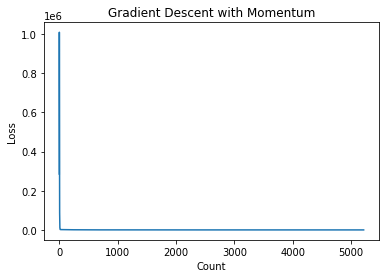

MSE gradient descent with momentum is:  76.68744567818362
Time gradient descent with momentum: 0.33716773986816406


In [7]:
start_time = time.time()
lr_momentum = MyLinearRegression()
loss_momentum = lr_momentum.fit_momentum(X,y)
iter = list(range(0,len(loss_momentum)))
plt.figure(1)
plt.title("Gradient Descent with Momentum")
plt.xlabel("Count")
plt.ylabel("Loss")
plt.plot(iter, loss_momentum)
plt.show()

print("MSE gradient descent with momentum is: ", lr_momentum.loss)
print("Time gradient descent with momentum: %s" % (time.time() - start_time))

y_predict = lr.predict(X)

Sklearn MSE is:  21.8948311817292
Time to execute SKLearn is: 1.4832959175109863


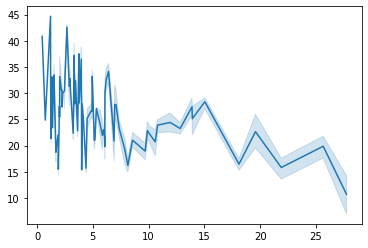

In [8]:
# SOLUTION FROM SKLEARN
start_time = time.time()
from sklearn.linear_model import LinearRegression
sk_linear = LinearRegression() 
reg = sk_linear.fit(X, y)
y_val_reg = reg.predict(X)
sns.lineplot(x= X[:,2], y = y_val_reg)
mean_sk = mean_squared_error(y_val_reg,y)
print("Sklearn MSE is: ",mean_sk)
print("Time to execute SKLearn is: %s" % (time.time() - start_time))

# Logistic Regression

*   Dataset: breast cancer dataset
*   Objective: implement both numerical solution
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


#   Numerical solution:

*   Loss function (Maximum Likelihood Estimator): $\mathcal{L} (y,\hat{y}) = -\frac{1}{N}\sum_{i=1}^N \left[y_i\cdot\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right]$

*   Logistic function : $\sigma(t) = \frac{1}{1+e^{-t}}$
      

In [126]:
import math 
X,y = datasets.load_breast_cancer(return_X_y = True)

In [127]:
from math import log
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.svm import SVC

In [128]:
minmax_scaler = MinMaxScaler()
X = minmax_scaler.fit_transform(X)
X = np.insert(X, 0, 1, axis=1)

In [129]:
y.shape

(569,)

In [167]:
class MyLogisticRegression:
    
    def logistic_function(self, t):
        return 1/(1 + np.exp(-t))

    def probability(self, X, beta):
        prod = np.dot(X, beta)
        prob = self.logistic_function(prod)
        return prob

    def cost_function(self, X, y, beta):   
        N = len(X)
        total_cost = -np.mean(y * np.log(self.probability(X, beta)) + (1 - y) * np.log(1 - self.probability(X, beta)))
        # total_cost = -np.mean(np.dot(y, np.log(self.probability(X, beta))) + np.dot((1 - y), np.log(1 - self.probability(X, beta))))
        return total_cost

    def grad_function(self, X, y, beta):
        N = y.shape[0]
        return (1 / N) * np.dot(X.T, self.probability(X, beta) - y)

    def fit(self, X, y, tau=0.0004, lr=0.02):        
        beta = np.ones(X.shape[1])
        N = len(X)
        loss_i = []
        cost_dif = 100 
        loss = self.cost_function(X, y, beta)         
        loss_i.append(loss)
        while cost_dif >= tau:        
            # Gradient Descent
            beta_new = beta - lr * self.grad_function(X, y, beta)   
            loss_new = self.cost_function(X, y, beta_new)
            cost_dif = abs(loss_new - loss)
            loss_i.append(loss_new)  
            # Saving Progress
            beta = beta_new
            loss = loss_new
        self.beta = beta
        self.loss = loss
        return loss_i 

    def predict(self, X):    
        predict = self.probability(X, self.beta)
        for i in range(0, len(predict)):
          if predict[i] > 0.5:
            predict[i] = 1
          else:
            predict[i] = 0
        return predict

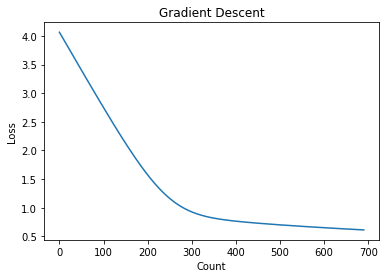

Loss gradient descent:  0.6111708179903372
Time gradient descent: 0.4031245708465576
[1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.

In [168]:
start_time = time.time()
logr = MyLogisticRegression()
loss_arr = logr.fit(X,y)
i = list(range(0, len(loss_arr)))
plt.figure(1)
plt.title("Gradient Descent")
plt.xlabel("Count")
plt.ylabel("Loss")
plt.plot(i, loss_arr)
plt.show()

print("Loss gradient descent: ", logr.loss)
print("Time gradient descent: %s" % (time.time() - start_time))

y_predict= logr.predict(X)
print(y_predict)

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logr = LogisticRegression()
reg_log = logr.fit(X, y)
y_val_log = reg_log.predict(X)
parameters = logr.coef_
predicted_classes = logr.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
mean_sk = mean_squared_error(y_val_log,y)
print("MSE: ", mean_sk)
print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters are: ")
print(parameters)


MSE:  0.028119507908611598
The accuracy score using scikit-learn is 0.9718804920913884
The model parameters are: 
[[ 8.29804444e-05 -1.89440718e+00 -1.71670064e+00 -1.85836344e+00
  -1.60274551e+00 -6.52584861e-01 -3.34216631e-01 -1.43625963e+00
  -2.14078489e+00 -5.48254023e-01  9.79010334e-01 -1.28511089e+00
  -3.89066634e-02 -9.89759999e-01 -8.49254295e-01 -5.99493630e-02
   6.58614177e-01  2.71482322e-01 -2.69146320e-01  2.28027906e-01
   6.39534469e-01 -2.43317397e+00 -2.36003808e+00 -2.22363875e+00
  -1.75914447e+00 -1.57677790e+00 -7.77500552e-01 -1.38336853e+00
  -2.73046139e+00 -1.33734489e+00 -3.35521404e-01]]


# Support Vector Machine


*   Dataset: breast cancer
*   Objective: understand how SVM work/ the effects of choosing kernels on dataset



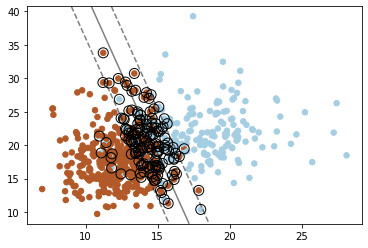

In [170]:
X, y = datasets.load_breast_cancer(return_X_y = True)
X = X[:,:2]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()